# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [20]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

In [21]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [22]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)



# Import Data

In [23]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

In [24]:
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [25]:
# Getting the data from the top 10 expensive neighbourhoods

top_10_exp_neighbouthood = to_data[["neighbourhood", "average_house_value"] ].groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False)
top_10_exp_neighbouthood.head()

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00

In [26]:
# Calculate the mean number of dwelling types units per year
# YOUR CODE HERE!

neighbourhood_mean_values = to_data.groupby("neighbourhood").mean().reset_index()
neighbourhood_mean_values.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [27]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

average_monthly_shelter_costs = to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean()
average_monthly_shelter_costs.head()


shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

### Panel Visualization Functions

In [32]:

# Define Panel visualization functions
def neighbourhood_map(lat, lon):
    
    plot = px.scatter_mapbox(
    df_neighbourhood_locations,
    lat="lat",
    lon="lon",
    zoom=9
)
    

    return  plot
lat="lat",
lon="lon",

neighbourhood_map(lat, lon)



   
    # YOUR CODE HERE!
    

    
    

NameError: name 'lat' is not defined

In [14]:
#pn.panel(plot)

In [29]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    # YOUR CODE HERE!
    def create_bar_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    ax=data.plot.bar(title = title, color=color)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    # YOUR CODE HERE!
    def create_line_chart(data, title, xlabel, ylabel, color):
    fig=plt.figure()
    ax=data.plot.line(title = title, color=color)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)    

    
def average_house_value():
    """Average house values per year."""
    
    # YOUR CODE HERE!
ax=Avg_House_value_per_year.plot.line(title = "Average House values in Toronto")
ax.set_ylabel("avg. house value")
ax.set_xlabel("year")

Avg_House_value_per_year



def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # YOUR CODE HERE!
df.hvplot( x="year",y="average_house_value",groupby="neighbourhood", title="average house value by neighbourhood")

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # YOUR CODE HERE!
    
number_of_dweliings.set_index('year').hvplot(kind="bar", stacked=False, groupby="neighbourhood",  xlabel="Year", ylabel="Dwelling Type Units",
    rot=90, height=500, width=700
)

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!
    average_house_value = px.bar(house_values, x="neighbourhood", y="average_house_value",
    color="average_house_value", facet_row="year", height=1200, width=900
)


def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""

top_10_avg_house_value.hvplot.bar(title="Top 10 Expensive neighbourhoods in Toronto", x="neighbourhood", y="average_house_value",
    rot=90, height=500
)
    
    
    # YOUR CODE HERE!

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [7]:
# Create a Title for the Dashboard
# YOUR CODE HERE!

# Define a welcome text
# YOUR CODE HERE!

# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the main dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=1024)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [3] Row
            [0] Column
                [0] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
            [1] Column
                [0] Plotly(Figure)
        [4] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
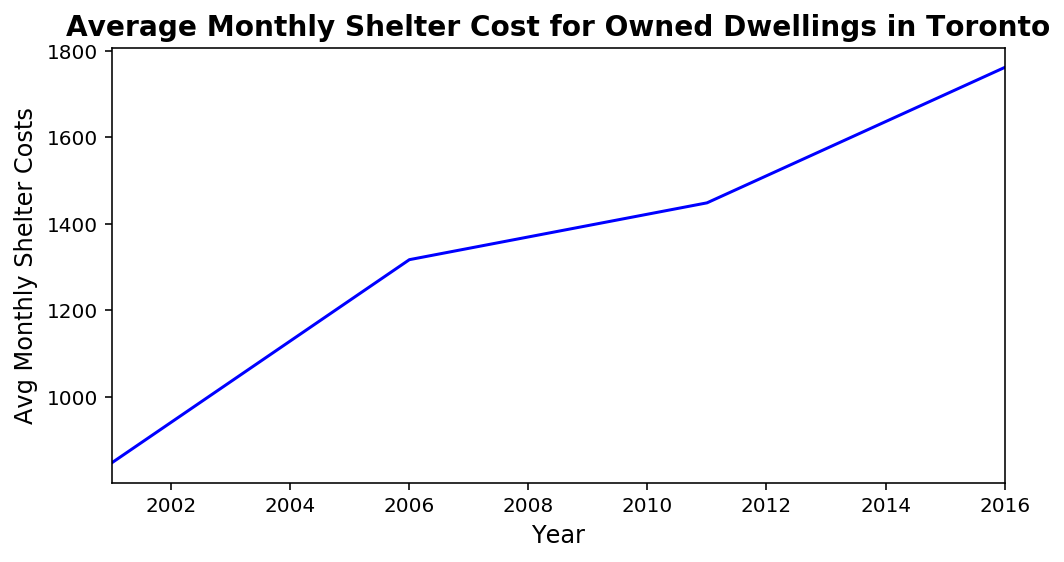
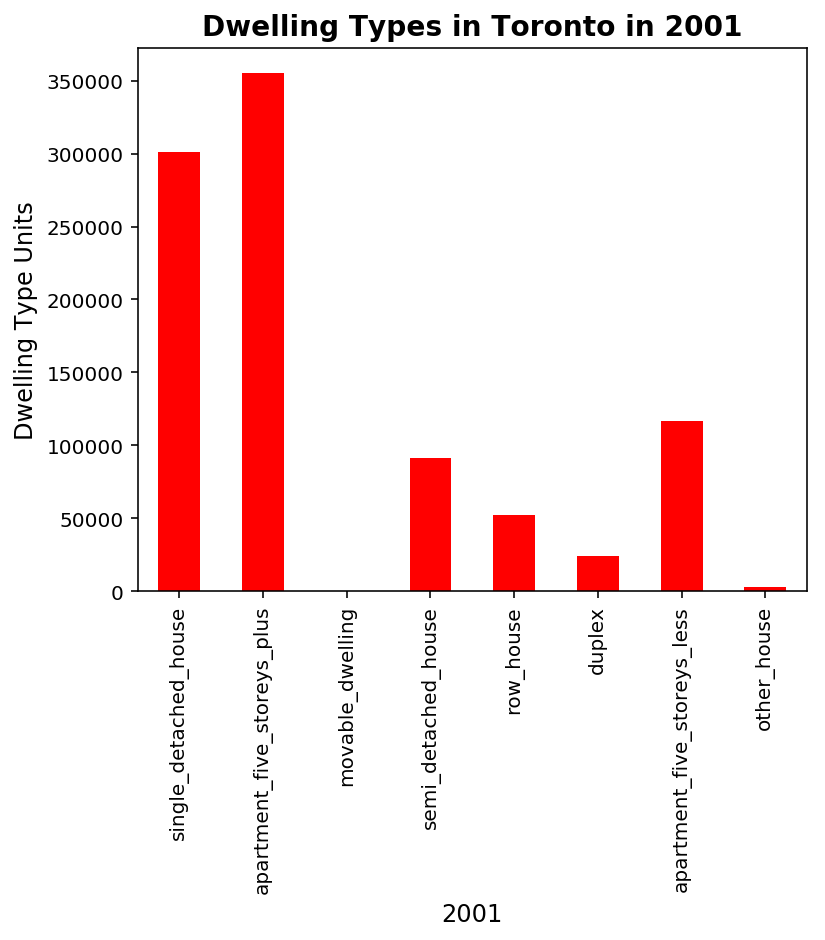
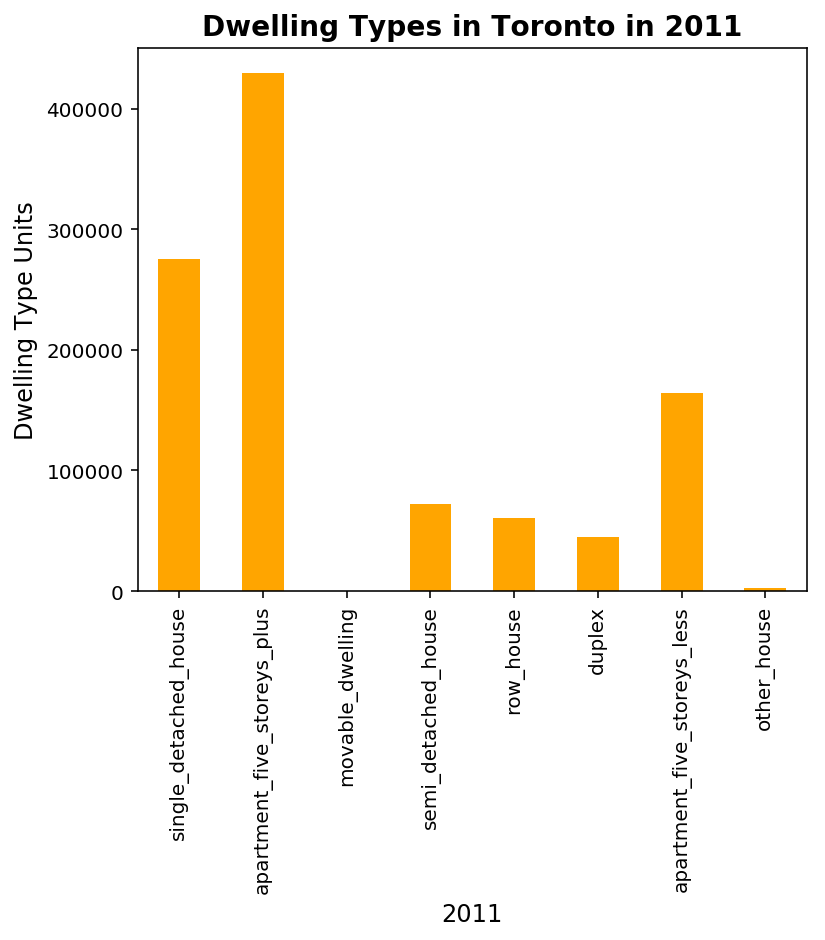
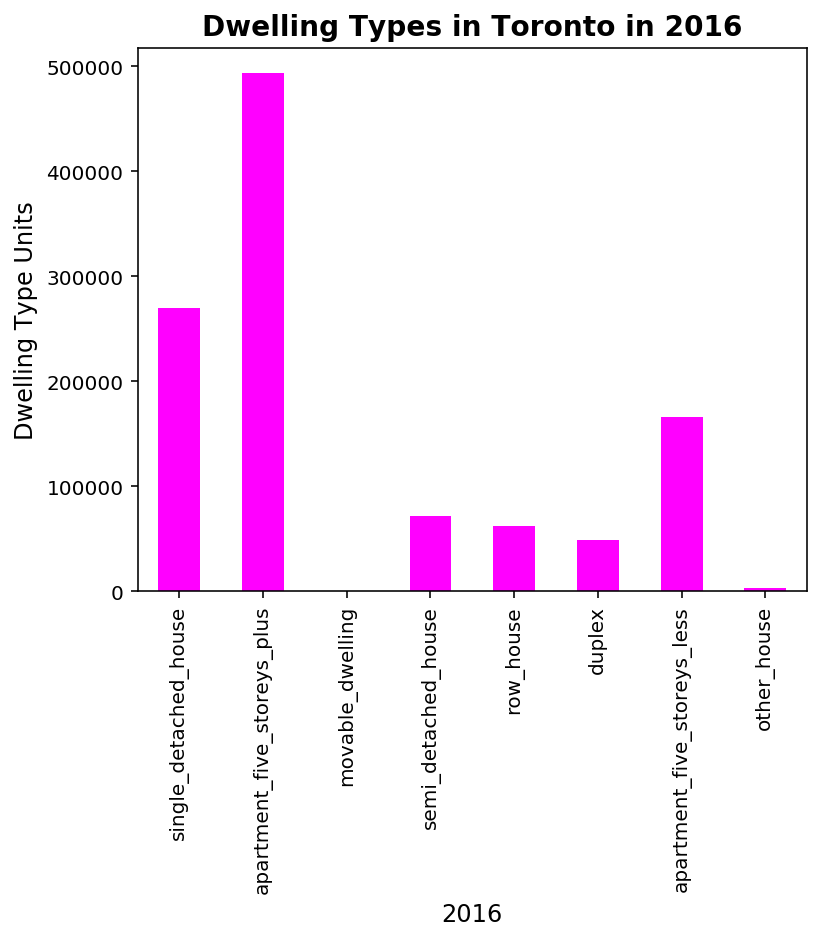
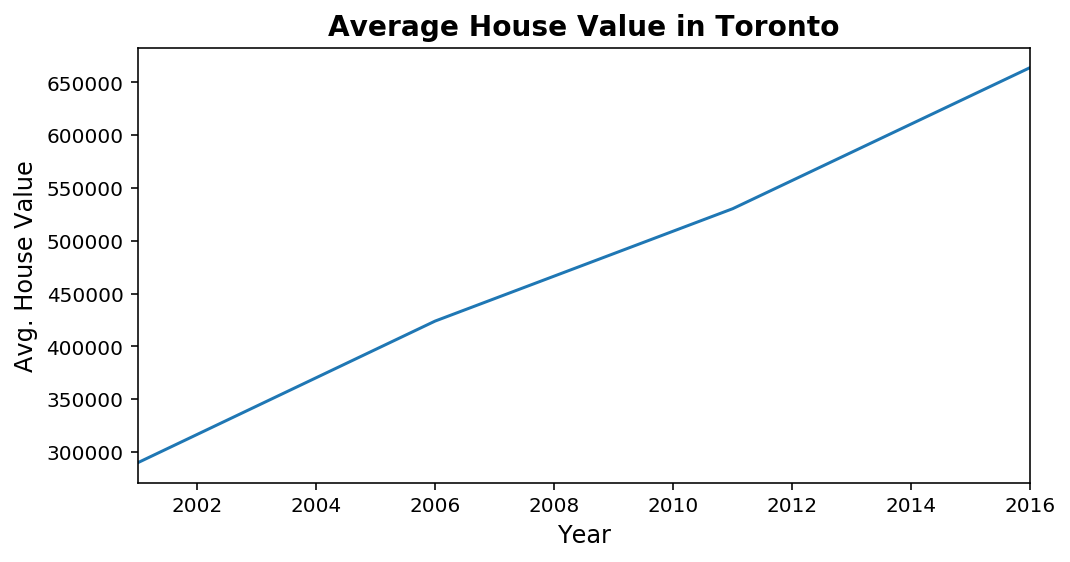
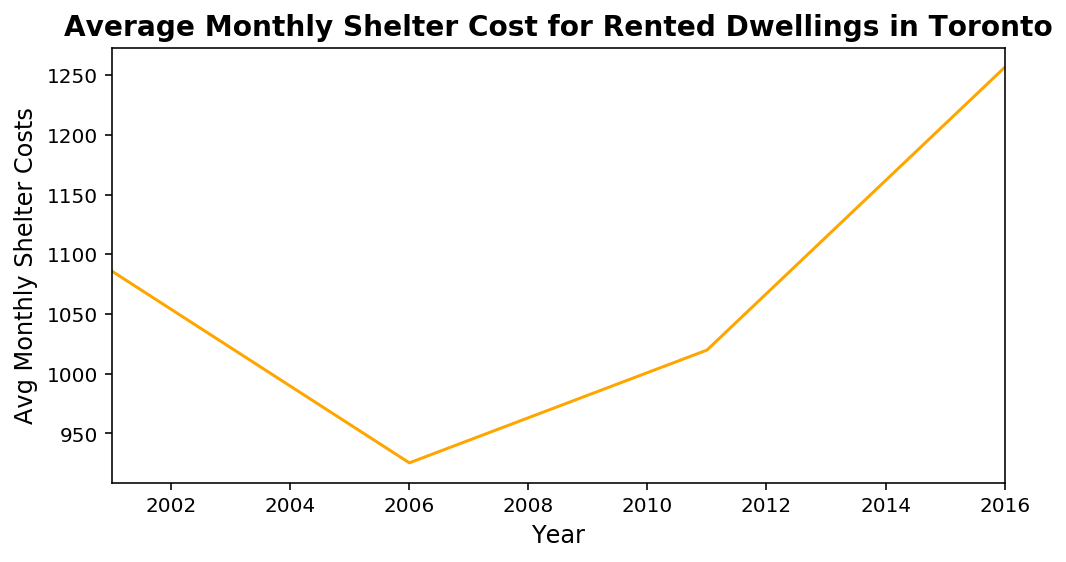
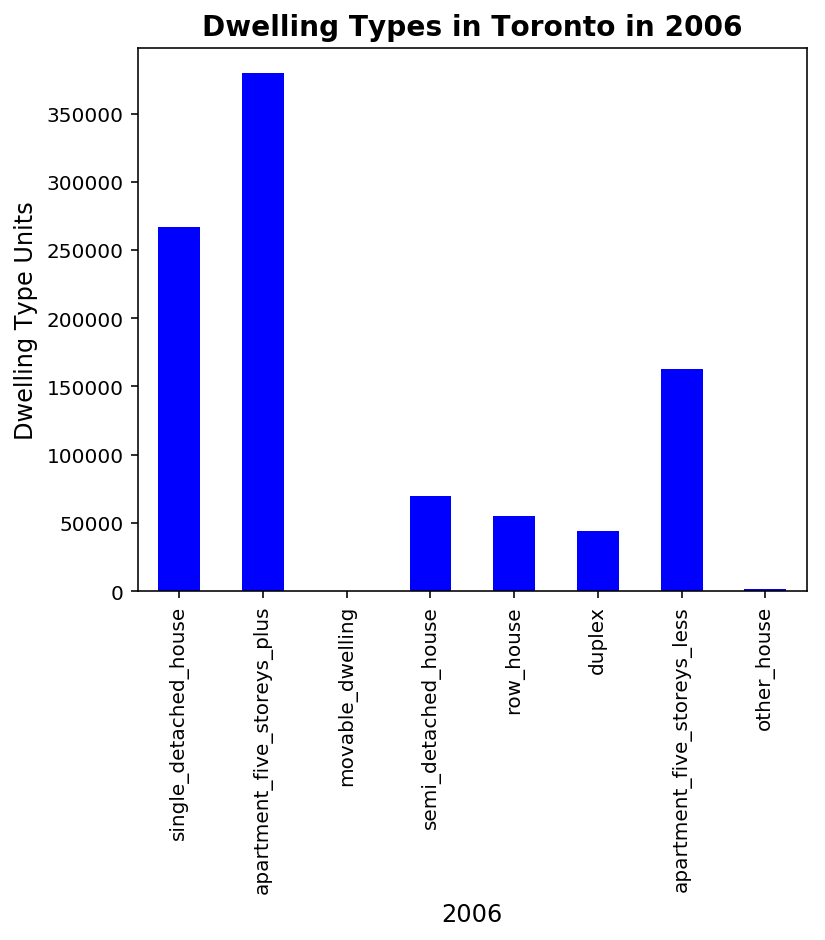

In [8]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [9]:
# neighbourhood_map().show()

In [10]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [11]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [12]:
# average_house_value()

In [13]:
# average_value_by_neighbourhood()

In [14]:
# number_dwelling_types()

In [15]:
# average_house_value_snapshot()

In [16]:
# top_most_expensive_neighbourhoods()

In [17]:
# sunburts_cost_analysis()